---
# Caso Limpieza de Sueldos de San Francisco

Después del análisis de datos que usted realizó sobre la nómina de sueldos de San Francisco, el alcalde notó los errores de datos que existían y los problemas que acarrean a la gestión. Por este motivo, decidió contratarlo para que haga un análisis de la calidad de datos y realice la limpieza de datos a efecto de contar con información confiable para la toma de decisiones. 


Como entregable, se solicita un notebook ordenado, documentado y reproducible en donde:

Realice un análisis de valores nulos en las columnas BasePay, OverTimePay, OtherPay, Benefits, TotalPay y TotalPayBenefits
Realice un análisis de outliers en la columna BasePay
Realice la limpieza de los datos de acuerdo a los criterios aprendidos (dejar, imputar, eliminar)
Genere un nuevo archivo Excel con los datos limpios


---

In [ ]:
import pandas as pd

In [3]:
# 1. Cargar datos
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('salarios_san_francisco.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


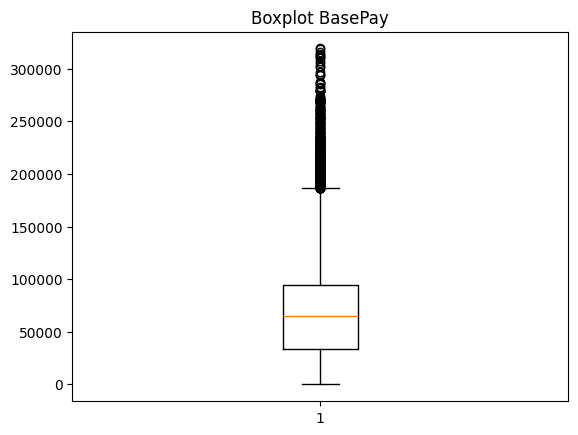

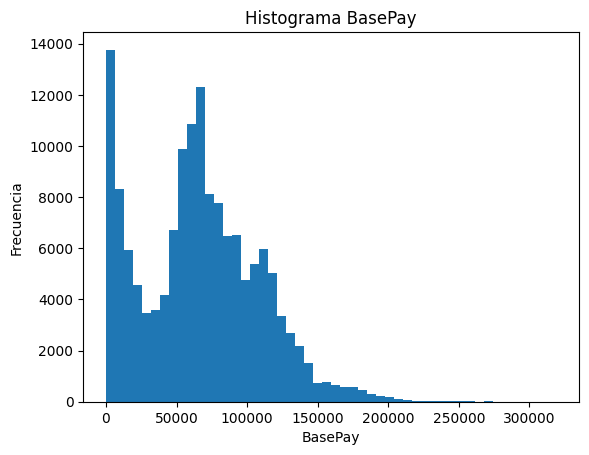

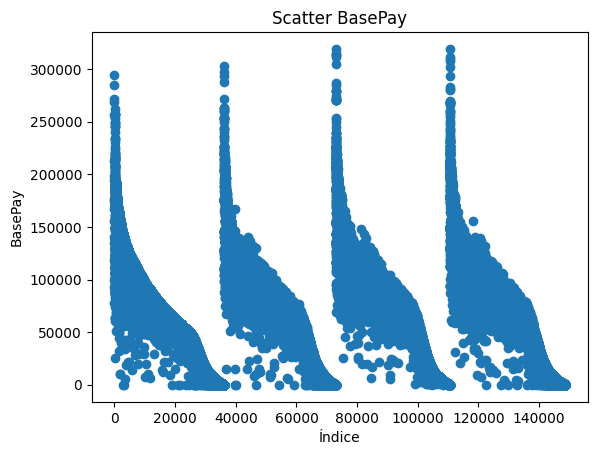

                 EmployeeName    BasePay
2              ALBERT PARDINI  212739.13
7               DAVID KUSHNER  256576.96
9          JOANNE HAYES-WHITE  285262.00
10              ARTHUR KENNEY  194999.39
12          EDWARD HARRINGTON  294580.02
...                       ...        ...
111314  Firoozeh Parsa Nezhad  187076.75
111317          Jignesh Desai  188189.15
111368        Elaine C Warren  191709.01
111403       Donald E Ellison  186851.70
111625           John G White  190176.04

[1037 rows x 2 columns]


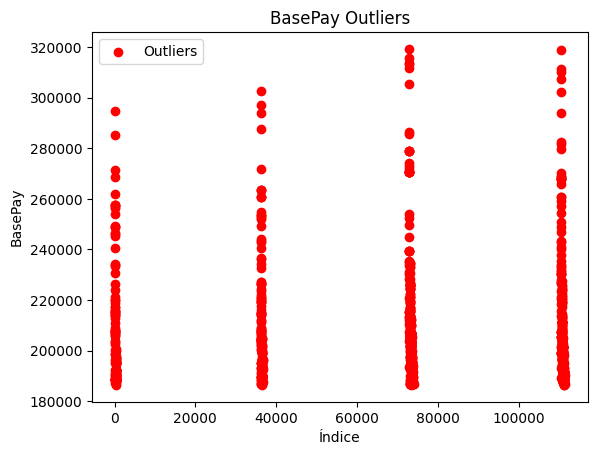

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
# 2. Análisis de valores nulos
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
df[cols].isnull().sum()

# 3. Análisis de outliers en BasePay
plt.boxplot(df['BasePay'].dropna())
plt.title('Boxplot BasePay')
plt.show()

plt.hist(df['BasePay'].dropna(), bins=50)
plt.title('Histograma BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frecuencia')
plt.show()

plt.scatter(df.index, df['BasePay'])
plt.title('Scatter BasePay')
plt.xlabel('Índice')
plt.ylabel('BasePay')
plt.show()

q1 = df['BasePay'].quantile(0.25)
q3 = df['BasePay'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['BasePay'] < q1 - 1.5 * iqr) | (df['BasePay'] > q3 + 1.5 * iqr)]
print(outliers[['EmployeeName', 'BasePay']])

# Scatter plot BasePay con outliers destacados
plt.scatter(df.index, df['BasePay'], label='Normal', alpha=0.5)

# Resaltar outliers en rojo
plt.scatter(outliers.index, outliers['BasePay'], color='red', label='Outliers')

plt.title('BasePay Outliers')
plt.xlabel('Índice')
plt.ylabel('BasePay')
plt.legend()
plt.show()

# 4. Limpieza de datos
# Imputar valores nulos en Benefits con 0
df['Benefits'] = df['Benefits'].fillna(0)
# Eliminar filas con nulos en BasePay, OvertimePay, OtherPay, TotalPay, TotalPayBenefits
df_clean = df.dropna(subset=cols)
df_clean.head()

# Imputar con la media o mediana
# Útil para columnas numéricas donde los valores nulos no son muchos:
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].median())

# Imputar con valores específicos
# Por ejemplo, si un valor nulo significa “sin pago extra”:
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()

# Corregir tipos de datos
# Por ejemplo, convertir columnas a numéricas:
df_clean['BasePay'] = pd.to_numeric(df_clean['BasePay'], errors='coerce')

# Limpiar outliers
# Puedes eliminar o ajustar outliers detectados:
# Eliminar outliers de BasePay usando IQR
q1 = df_clean['BasePay'].quantile(0.25)
q3 = df_clean['BasePay'].quantile(0.75)
iqr = q3 - q1
df_clean = df_clean[(df_clean['BasePay'] >= q1 - 1.5 * iqr) & (df_clean['BasePay'] <= q3 + 1.5 * iqr)]

# Limpiar outliers
# Puedes eliminar o ajustar outliers detectados:
df_clean = df_clean[df_clean['BasePay'] >= 0]

# 5. Guardar datos limpios en Excel
# df_clean.to_excel('salarios_san_francisco_limpio.xlsx', index=False)